In [2]:
import os
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from rsgislib.segmentation.shepherdseg import run_shepherd_segmentation
import rasterio
from rasterio.plot import show
from osgeo import gdal, ogr, osr
import pandas as pd
import geopandas as gpd

## 1/ Load Data

In [14]:
"""
Define directories
"""
# This is the location of the original tiff dataset
tiff_location = '../resources/source_tiff/'
# The location of the segmented tiff images
segmented_images_location = '../resources/segmented/'
# The location of the extracted shapefiles
shp_location = '../resources/shp/'
# The location of the extracted dam reservoir shapefile
largest_polygons_location = "../resources/reservoir_shp/"


In [15]:
"""
Helper functions for the important tasks
"""
# perform segmentation on a tiff image
def segment_tiff(input_image_location, input_image_name):
    output_seg_image = input_image_name
    run_shepherd_segmentation(input_image_location, output_seg_image,
                          gdalformat='GTiff',
                          calc_stats=False,
                          num_clusters=20,
                          min_n_pxls=300)

# generate and store the shapefile from the segmented image
def generate_shapefile(input_image_location, input_image_name):
    # Path to the segmented images
    in_path = input_image_location
    out_name = input_image_name.split(".")[0]
    out_path = shp_location + input_image_name + ".shp"

    #  get raster datasource
    src_ds = gdal.Open(in_path)
    
    srcband = src_ds.GetRasterBand(1)
    dst_layername = 'oilpalm_HarvestedAreaHectares'
    drv = ogr.GetDriverByName("ESRI Shapefile")
    dst_ds = drv.CreateDataSource( out_path )

    sp_ref = osr.SpatialReference()
    sp_ref.SetFromUserInput('EPSG:4326')

    dst_layer = dst_ds.CreateLayer(dst_layername, srs = sp_ref )

    fld = ogr.FieldDefn("HA", ogr.OFTInteger)
    dst_layer.CreateField(fld)
    dst_field = dst_layer.GetLayerDefn().GetFieldIndex("HA")

    gdal.Polygonize( srcband, None, dst_layer, dst_field, [], callback=None )

    del src_ds
    del dst_ds

# Extract the layer with the largest area from a shapefile
def extract_largest_polygon_shp(input_file_name):
    # Step 1: Read the Shapefile
    input_shapefile = shp_location + input_file_name
    gdf = gpd.read_file(input_shapefile)

    # Step 2: Calculate Areas
    gdf['area'] = gdf.geometry.area

    # Step 3: Find the Largest Polygon
    largest_polygon_idx = gdf['area'].idxmax()
    largest_polygon = gdf.loc[largest_polygon_idx]

    # Step 4: Create a New GeoDataFrame
    largest_polygon_gdf = gpd.GeoDataFrame([largest_polygon], crs=gdf.crs)

    # Step 5: Write to a New Shapefile
    output_shapefile = largest_polygons_location + input_file_name
    largest_polygon_gdf.to_file(output_shapefile)

# Get a polygon area from a shapefile and convert it to km²
def get_polygon_area(input_shp):
    test = gpd.read_file(largest_polygons_location + input_shp)

    # Return the area of the polygon
    #tost = test.copy()
    tost= test.to_crs({'init': 'epsg:32633'})
    tost["area"] = tost['geometry'].area/ 10**6
    #tost.head(2)

    area_value = float(tost['area'].iloc[0])

    # return the area in km²
    return round(area_value, 3)
    #print(rounded_area_value)


In [ ]:
"""
Image Segmentation
"""
files = os.listdir(tiff_location)

# Loop over each file in the directory
for file in files:
    # Store the current image name with extension in a variable
    image_name = file
    segment_tiff(tiff_location+image_name, image_name)
    print(image_name)


Stretch Input Image
Add 1 to stretched file to ensure there are no all zeros (i.e., no data) regions created.
Create Input Image Mask.
Mask stretched Image.
Deleting file: .\01-08-2020_stchdonly.tif
Deleting file: .\01-08-2020_stchdonly_off.tif
Deleting file: .\01-08-2020_stchdmaskonly.tif
Performing KMeans.
Apply KMeans to image.
Eliminate Single Pixels.
Perform clump.
Eliminate small pixels.
Relabel clumps.
Deleting file: .\01-08-2020_kmeansclusters.gmtxt
Deleting file: .\01-08-2020_kmeans.tif
Deleting file: .\01-08-2020_kmeans.tif.aux.xml
Deleting file: .\01-08-2020_kmeans_nosgl.tif
Deleting file: .\01-08-2020_kmeans_nosgl_tmp.tif
Deleting file: .\01-08-2020_clumps.tif
Deleting file: .\01-08-2020_clumps_elim.tif
Deleting file: .\01-08-2020_stchd.tif
01-08-2020.tiff
Stretch Input Image
Add 1 to stretched file to ensure there are no all zeros (i.e., no data) regions created.
Create Input Image Mask.
Mask stretched Image.
Deleting file: .\01-08-2021_stchdonly.tif
Deleting file: .\01-08

In [117]:
"""
Create Shapefiles
"""
files = os.listdir(segmented_images_location)

# Loop over each file in the directory
for file in files:
    # Store the current image name with extension in a variable
    image_name = file
    generate_shapefile(segmented_images_location + image_name, image_name)

01-10-2019.tiff
02-06-2020.tiff
03-06-2019.tiff
03-07-2019.tiff
05-03-2019.tiff
05-11-2019.tiff
05-12-2019.tiff
07-08-2019.tiff
08-04-2020.tiff
09-05-2019.tiff
10-03-2019.tiff
12-06-2020.tiff
12-08-2019.tiff
13-02-2020.tiff
13-06-2019.tiff
13-07-2019.tiff
14-01-2020.tiff
14-03-2020.tiff
16-09-2019.tiff
17-06-2020.tiff
17-08-2019.tiff
18-06-2019.tiff
19-01-2020.tiff
20-11-2019.tiff
20-12-2019.tiff
21-10-2019.tiff
22-08-2019.tiff
23-02-2020.tiff
23-05-2020.tiff
23-07-2019.tiff
24-04-2019.tiff
25-12-2019.tiff
26-10-2019.tiff
27-08-2019.tiff
28-02-2020.tiff
28-04-2020.tiff
28-06-2019.tiff
28-07-2019.tiff
29-01-2020.tiff
30-03-2019.tiff
31-10-2019.tiff


In [152]:
"""
Extract the largest water body polygon
"""

files = os.listdir(shp_location)

# Loop over each file in the directory
for file in files:
    # Store the current image name with extension in a variable
    if file.endswith('.shp'):
        shp_name = file
        extract_largest_polygon_shp(shp_name)

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

In [162]:
"""
Import the csv dataset containing the training and test data
and store it in a dataframe
"""
# Define data types for each column
dtype_dict = {
    'date': 'object',  # We'll convert it to datetime later with custom format
    'source_image': 'str',
    'volume': 'float64',
    'fill_percentage': 'float64',
    'calculated_area': 'float64'
}

df = pd.read_csv('csv/dam_sidi_salem_dataset.csv', header=0, delimiter=';', decimal=',', dtype=dtype_dict)

# Display the DataFrame
print(df.head())


         date     source_image   volume  fill_percentage  calculated_area
0  01/08/2020  01-08-2020.tiff  330.143            56.05              NaN
1  01/08/2021  01-08-2021.tiff  172.138            29.23              NaN
2  01/08/2022  01-08-2022.tiff  146.174            24.82              NaN
3  01/09/2017  01-09-2017.tiff  115.994            19.69              NaN
4  01/09/2018  01-09-2018.tiff  113.723            19.31              NaN


In [163]:
"""
Store polygon area in the dataframe
"""
# List all files in the directory
files = os.listdir(largest_polygons_location)

# Loop over each row in the DataFrame
for index, row in df.iterrows():
    source_image = row['source_image']
    # Check if the source_image value matches any file name in the directory
    df.at[index, 'calculated_area'] = get_polygon_area(source_image +".shp")

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initial

In [12]:
# Assuming you have an existing DataFrame called df

# Define the file path where you want to save the CSV file
csv_file_path = '../csv/dataset.csv'

# Store the DataFrame in a CSV file
df.to_csv(csv_file_path, index=False)

NameError: name 'df' is not defined

In [164]:
df

,date,source_image,volume,fill_percentage,calculated_area
0,01/08/2020,01-08-2020.tiff,330.143,56.05,32.899
1,01/08/2021,01-08-2021.tiff,172.138,29.23,23.215
2,01/08/2022,01-08-2022.tiff,146.174,24.82,22.012
3,01/09/2017,01-09-2017.tiff,115.994,19.69,21.226
4,01/09/2018,01-09-2018.tiff,113.723,19.31,21.094
...,...,...,...,...,...
201,31/08/2020,31-08-2020.tiff,286.442,48.63,30.150
202,31/08/2021,31-08-2021.tiff,132.258,22.45,18.182
203,31/10/2017,31-10-2017.tiff,87.793,14.91,18.459
204,31/10/2018,31-10-2018.tiff,178.394,30.29,24.537


In [1]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['calculated_area'], df['volume'], color='blue', alpha=0.5)
plt.title('Volume vs Area')
plt.xlabel('Calculated Area (Km²)')
plt.ylabel('Volume (m³)')
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [124]:
train_data_path = "source_data/test/"
# Load the source Tiff file
input_image = train_data_path + '08-04-2023.tiff'

## 2/ Data Processing and Feature Extraction

### Feature segmentation

In [30]:
output_seg_image = 'segmented.tiff'
run_shepherd_segmentation(input_image, output_seg_image,
                          gdalformat='GTiff',
                          calc_stats=False,
                          num_clusters=20,
                          min_n_pxls=300)
# Path to the segmented image
result_segmentation = "segmented.tiff"

Stretch Input Image
Add 1 to stretched file to ensure there are no all zeros (i.e., no data) regions created.
Create Input Image Mask.
Mask stretched Image.
Deleting file: .\08-04-2023_stchdonly.tif
Deleting file: .\08-04-2023_stchdonly_off.tif
Deleting file: .\08-04-2023_stchdmaskonly.tif
Performing KMeans.
Apply KMeans to image.
Eliminate Single Pixels.
Perform clump.
Eliminate small pixels.
Relabel clumps.
Deleting file: .\08-04-2023_kmeansclusters.gmtxt
Deleting file: .\08-04-2023_kmeans.tif
Deleting file: .\08-04-2023_kmeans.tif.aux.xml
Deleting file: .\08-04-2023_kmeans_nosgl.tif
Deleting file: .\08-04-2023_kmeans_nosgl_tmp.tif
Deleting file: .\08-04-2023_clumps.tif
Deleting file: .\08-04-2023_clumps_elim.tif
Deleting file: .\08-04-2023_stchd.tif


### Generate ShapeFile From Tiff

In [ ]:
#in_path = result_segmentation
in_path = input_image
out_path = 'polygons1.shp'

#  get raster datasource
src_ds = gdal.Open(in_path)
#
srcband = src_ds.GetRasterBand(1)
dst_layername = 'oilpalm_HarvestedAreaHectares'
drv = ogr.GetDriverByName("ESRI Shapefile")
dst_ds = drv.CreateDataSource( out_path )

sp_ref = osr.SpatialReference()
sp_ref.SetFromUserInput('EPSG:4326')

dst_layer = dst_ds.CreateLayer(dst_layername, srs = sp_ref )

fld = ogr.FieldDefn("HA", ogr.OFTInteger)
dst_layer.CreateField(fld)
dst_field = dst_layer.GetLayerDefn().GetFieldIndex("HA")

gdal.Polygonize( srcband, None, dst_layer, dst_field, [], callback=None )

del src_ds
del dst_ds

In [ ]:
# Read Shapefile content using GeoPanda
shapefile = gpd.read_file("polygons1.shp")
print(shapefile)

### Extract the largest polygon from the shapefile

In [16]:
"""
Display the Largest Polygon
"""

# Step 1: Read the Shapefile
input_shapefile = "polygons1.shp"
gdf = gpd.read_file(input_shapefile)

# Step 2: Calculate Areas
gdf['area'] = gdf.geometry.area

# Step 3: Find the Largest Polygon
largest_polygon_idx = gdf['area'].idxmax()
largest_polygon = gdf.loc[largest_polygon_idx]

# Step 4: Create a New GeoDataFrame
largest_polygon_gdf = gpd.GeoDataFrame([largest_polygon], crs=gdf.crs)

# Step 5: Write to a New Shapefile
output_shapefile = "largest_polygon1.shp"
largest_polygon_gdf.to_file(output_shapefile)


C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


In [8]:
test = gpd.read_file("../reservoir_shp/01-08-2020.tiff.shp")
print(test.crs)
test.head(2)

epsg:4326


,HA,area,geometry
0,421,0.003297,"POLYGON ((9.40093 36.69784, 9.40138 36.69784, ..."


In [11]:
from osgeo import ogr

def get_layer_names(shapefile_path):
    driver = ogr.GetDriverByName("ESRI Shapefile")
    dataSource = driver.Open(shapefile_path, 0)  # 0 means read-only access

    if dataSource is None:
        print("Could not open {}".format(shapefile_path))
        return None

    layer_names = []
    for i in range(dataSource.GetLayerCount()):
        layer = dataSource.GetLayerByIndex(i)
        layer_name = layer.GetName()
        layer_names.append(layer_name)

    dataSource = None  # Close the shapefile
    return layer_names

# Example usage
shapefile_path = "../resources/shp/01-08-2020.tiff.shp"
layer_names = get_layer_names(shapefile_path)
if layer_names:
    print("Layer names:", layer_names)


Layer names: ['01-08-2020.tiff']


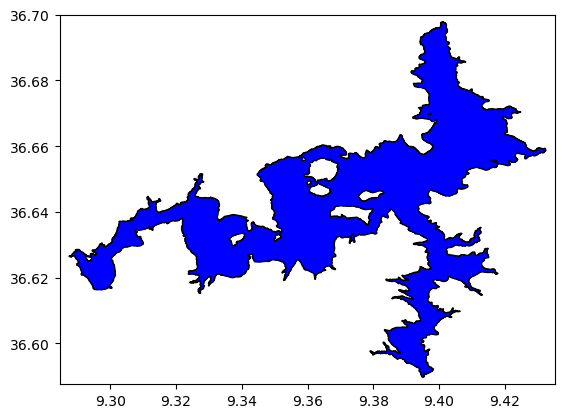

In [161]:
# Extract first layer of features from shapefile using OGR
ds = ogr.Open('reservoir_shp/01-08-2020.tiff.shp')
nlay = ds.GetLayerCount()
lyr = ds.GetLayer(0)

# Get extent and calculate buffer size
ext = lyr.GetExtent()
xoff = (ext[1]-ext[0])/50
yoff = (ext[3]-ext[2])/50

# Prepare figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(ext[0]-xoff,ext[1]+xoff)
ax.set_ylim(ext[2]-yoff,ext[3]+yoff)

paths = []
lyr.ResetReading()

# Read all features in layer and store as paths
for feat in lyr:
    geom = feat.geometry()
    codes = []
    all_x = []
    all_y = []
    for i in range(geom.GetGeometryCount()):
        # Read ring geometry and create path
        r = geom.GetGeometryRef(i)
        x = [r.GetX(j) for j in range(r.GetPointCount())]
        y = [r.GetY(j) for j in range(r.GetPointCount())]
        # skip boundary between individual rings
        codes += [mpath.Path.MOVETO] + \
                     (len(x)-1)*[mpath.Path.LINETO]
        all_x += x
        all_y += y
    path = mpath.Path(np.column_stack((all_x,all_y)), codes)
    paths.append(path)

# Add paths as patches to axes
for path in paths:
    patch = mpatches.PathPatch(path, \
            facecolor='blue', edgecolor='black')
    ax.add_patch(patch)

ax.set_aspect(1.0)
plt.show()

In [65]:
# Return the area of the polygon
tost = test.copy()
tost= tost.to_crs({'init': 'epsg:32633'})
tost["area"] = tost['geometry'].area/ 10**6
tost.head(2)

area_value = float(tost['area'].iloc[0])

# Rounding the value to three decimal places
rounded_area_value = round(area_value, 3)

print(rounded_area_value)

C:\Users\engal\.conda\envs\osgeo-env-v1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


16.651


In [56]:
"""
To be deleted 

"""

# Directory containing the images
folder_path = "source_data/all_images"

# List to store data
data = []

# Iterate through the files in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".tiff"):
        # Extract date from filename
        date = filename.split(".")[0]
        # Append data to list
        data.append({"date": date, "source_image": filename})

# Create DataFrame
df = pd.DataFrame(data)

# Add columns for volume and percentage
df["volume"] = None
df["fill_percentage"] = None
df["calculated_area"] = None

df['date'].apply(pd.to_datetime, format="%d-%m-%Y").dt.date


#df['date'].apply(pd.to_datetime, format="%Y-%m-%d").dt.date
# Convert object type to datetime object
#df["date"] = df["date"].astype('datetime64[ns]')


df.sort_values(by='date', inplace = True)


# Add column headers
df.columns = ["date","source_image", "volume", "fill_percentage","calculated_area"]

# Save DataFrame to CSV
df.to_csv("source.csv", index=False)

In [125]:


# Define data types for each column
dtype_dict = {
    'date': 'object',  # We'll convert it to datetime later with custom format
    'source_image': 'str',
    'volume': 'float64',
    'fill_percentage': 'float64',
    'calculated_area': 'float64'
}

# Import CSV file into DataFrame with ';' delimiter and ',' decimal separator
df = pd.read_csv('dam_sidi_salem_dataset.csv', header=0, delimiter=';', decimal=',', dtype=dtype_dict)

# Convert 'date' column to datetime with custom format
#df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

# Display the DataFrame
print(df.head())


         date     source_image   volume  fill_percentage  calculated_area
0  01/08/2020  01-08-2020.tiff  330.143            56.05              NaN
1  01/08/2021  01-08-2021.tiff  172.138            29.23              NaN
2  01/08/2022  01-08-2022.tiff  146.174            24.82              NaN
3  01/09/2017  01-09-2017.tiff  115.994            19.69              NaN
4  01/09/2018  01-09-2018.tiff  113.723            19.31              NaN


In [126]:
df

,date,source_image,volume,fill_percentage,calculated_area
0,01/08/2020,01-08-2020.tiff,330.143,56.05,NaN
1,01/08/2021,01-08-2021.tiff,172.138,29.23,NaN
2,01/08/2022,01-08-2022.tiff,146.174,24.82,NaN
3,01/09/2017,01-09-2017.tiff,115.994,19.69,NaN
4,01/09/2018,01-09-2018.tiff,113.723,19.31,NaN
...,...,...,...,...,...
222,31/08/2020,31-08-2020.tiff,286.442,48.63,NaN
223,31/08/2021,31-08-2021.tiff,132.258,22.45,NaN
224,31/10/2017,31-10-2017.tiff,87.793,14.91,NaN
225,31/10/2018,31-10-2018.tiff,178.394,30.29,NaN


In [134]:
# Assuming you have an existing DataFrame called df with 'date' and 'volume' columns

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

# Sort DataFrame by 'date' column
df.sort_values(by='date', inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volume'], marker='o', linestyle='-')
plt.title('Volume as a function of Date')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: unconverted data remains: 20